In [625]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime 
from sklearn import metrics
import matplotlib.pyplot as plt

In [626]:
data=pd.read_csv('problem_2_train.csv')
X=data.iloc[:,0:15]
Y=data['tat_in_days']

data.dtypes

X=X.drop(columns=['srno','pickuppartnerid','deliverypartnerid','insuranceCompanyId','claimtype','memcreateddate','mobilepurchasedate','claimintdate','servicecntrid'])


In [627]:
Pred=pd.read_csv('problem_2_test.csv')
Pred=Pred.drop(columns=['srno','pickuppartnerid','deliverypartnerid','insuranceCompanyId','claimtype','memcreateddate','mobilepurchasedate','claimintdate','servicecntrid'])

In [628]:
Pred.shape

(2116, 6)

In [629]:
data[data.notnull()]

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,2838589,AM,2,110018,233,233,228,B,ADLD,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,2855214,AN,21,110015,233,233,131,A,ADLD,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8
5,2852784,AN,21,110015,233,233,131,B,ADLD,132001,2017-12-22,2017-12-17,2018-02-08,4580,2018-02-15,9
6,2844713,C,2,110018,233,233,131,A,ADLD,110059,2017-08-26,2017-08-22,2018-02-06,4094,2018-02-09,15
7,2829719,C,6,160059,233,233,131,B,ADLD,151001,2017-03-14,2017-03-13,2018-02-01,4549,2018-02-10,16
8,2833619,AN,3,560011,201,233,131,A,ADLD,560076,2017-07-23,2017-07-22,2018-02-03,4467,2018-02-08,17
9,2870579,AJ,5,380009,233,233,131,B,ADLD,390006,2017-06-01,2017-05-31,2018-02-14,4422,2018-02-20,11


In [630]:
#Data Preprocessing
#X["memcreateddate"]=pd.to_datetime(X.memcreateddate)
X.dtypes
#X["claimintdate"]=pd.to_datetime(X.claimintdate)
X["pickupStartdate"]=pd.to_datetime(X.pickupStartdate)
Pred["pickupStartdate"]=pd.to_datetime(Pred.pickupStartdate)
#X["mobilepurchasedate"]=pd.to_datetime(X.mobilepurchasedate)

#X['memcreateddate'] = data['memcreateddate'].astype(int)
#X['claimintdate']=X['claimintdate'].map(datetime.toordinal)
X['pickupStartdate']=X['pickupStartdate'].map(datetime.toordinal)
#X['mobilepurchasedate']=X['mobilepurchasedate'].map(datetime.toordinal)
#X['memcreateddate']=X['memcreateddate'].map(datetime.toordinal)
Pred['pickupStartdate']=Pred['pickupStartdate'].map(datetime.toordinal)
X.dtypes
Pred.dtypes

mobmake                object
hubid                   int64
hubpincode              int64
custpincodecategory    object
custpincode             int64
pickupStartdate         int64
dtype: object

In [631]:
#Categorical Data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_X=LabelEncoder()
X['mobmake']=labelencoder_X.fit_transform(X['mobmake'])
X['custpincodecategory']=labelencoder_X.fit_transform(X['custpincodecategory'])
#X['claimtype']=labelencoder_X.fit_transform(X['claimtype'])
#X['claimtype']=labelencoder_X.fit_transform(X['claimtype'])

#onehotencoder=OneHotEncoder(categorical_features=X['claimtype'])
#X=onehotencoder.fit_transform(X).toarray()

Pred['mobmake']=labelencoder_X.fit_transform(Pred['mobmake'])
Pred['custpincodecategory']=labelencoder_X.fit_transform(Pred['custpincodecategory'])
#labelencoder_Y=LabelEncoder()
#y=labelencoder_Y.fit_transform(Y)

#sns.pairplot(data,x_vars=['mobmake'],y_vars='tat_in_days',size=7,aspect=0.7,kind='reg')

In [632]:
X.dtypes

mobmake                int32
hubid                  int64
hubpincode             int64
custpincodecategory    int32
custpincode            int64
pickupStartdate        int64
dtype: object

In [633]:
Pred.dtypes

mobmake                int32
hubid                  int64
hubpincode             int64
custpincodecategory    int32
custpincode            int64
pickupStartdate        int64
dtype: object

In [634]:
Pred.shape

(2116, 6)

In [635]:
#splitting dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
X.dtypes

mobmake                int32
hubid                  int64
hubpincode             int64
custpincodecategory    int32
custpincode            int64
pickupStartdate        int64
dtype: object

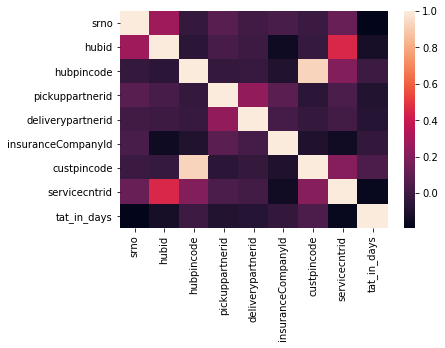

In [636]:
corr=data.corr()
sns.heatmap(corr)

In [637]:
X.shape

(6250, 6)

In [638]:
Pred.shape

(2116, 6)

In [639]:
# from sklearn.preprocessing import Imputer
# imputer =Imputer(missing_values=0,strategy='mean',axis=1)
# imputer=imputer.fit(X)
# X=imputer.transform(X)

In [640]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)
X_train


array([[-0.03551496,  1.13816008,  0.28332358, -0.54153824,  0.06929688,
        -0.66194674],
       [ 0.80527481, -0.94892285,  1.02874094, -0.54153824,  0.92654583,
         1.23954337],
       [-1.54893654, -0.61938344, -0.8356625 ,  0.73705313, -1.09412316,
        -1.18485652],
       ...,
       [-0.03551496,  1.02831361, -1.06894601, -0.54153824, -1.20224698,
         1.09693162],
       [-0.70814677, -0.94892285,  1.02874094,  0.73705313,  1.0579228 ,
        -0.47179773],
       [ 0.80527481, -0.17999756, -0.52822743, -0.54153824, -0.65614187,
         0.57402183]])

In [641]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
Pred=sc_X.fit_transform(Pred)
Pred=sc_X.fit_transform(Pred)
Pred

array([[ 0.07440665, -0.98540123,  1.04584713, -0.56825865,  0.94062104,
        -1.65667696],
       [-0.54954768, -1.09440944, -1.06364696, -0.56825865, -1.18833229,
        -1.56046639],
       [-0.54954768, -0.98540123,  1.04584713,  1.96052223,  1.08215896,
        -0.59836065],
       ...,
       [ 0.49037621, -0.00432736, -0.1636384 , -0.56825865, -0.28017837,
        -1.27183467],
       [ 0.07440665,  1.08575473,  0.29622909, -0.56825865,  0.08873034,
        -0.50215008],
       [ 0.49037621, -1.09440944, -1.06364696, -0.56825865, -1.18808158,
        -0.16541307]])

In [642]:
Pred.shape

(2116, 6)

In [643]:
#Simple Linear Regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

Y_pred=regressor.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))
#list(zip(X,regressor.coef_))

# plt.scatter(X['pickuppartnerid'],Y_train,color='red')
# plt.plot(X_train,Y_pred,color='blue')
# plt.show()

4.931631577695071


In [612]:
#Multiple Linear Regression
#Backward Elimination
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

Y_pred=regressor.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))
#Backward elimination
#import statsmodels.formula.api as sm
# x=np.append(arr=np.ones(50,1).astype(int),values=X,axis=1)

# X_opt=X[:,[0,1,2,3,4,5]]
# regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
# regressor_OLS.summary()

4.931631577695071


In [644]:
Pred.shape

(2116, 6)

In [645]:
#Polynomial Regression
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# regressor=PolynomialFeatures(degree=2)
# X_poly=regressor.fit_transform(X_train)
# lin_reg=LinearRegression()
# lin_reg.fit(X_poly,Y_train)
# Y_pred=lin_reg.predict(X_test)
# #Y_pred=regressor.predict(X_test)
# print(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

In [646]:
#Support vector regression
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X_train,Y_train)
#do feature scaling

#Y_pred=regressor.predict(sc_X.transform(np.array([[6.5]])))
Y_pred=regressor.predict(X_test)

#do inverse scaling
#Y_pred=sc_Y.inverse_transform(...)
print(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

4.6193922641207825


In [647]:
#Decision tree regression
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,Y_train)
print(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))


4.6193922641207825


In [648]:
#Random forest regression
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(X,Y)

print(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

4.6193922641207825


In [649]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gbreg = GradientBoostingRegressor()
gbreg.fit(X_train, Y_train)
Y_pred = gbreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

4.45034686128288


# So the best model is Gradient Boosting Regression

In [650]:
Pred.shape

(2116, 6)

In [652]:
reg = GradientBoostingRegressor()
reg.fit(X_train, Y_train)
prediction = reg.predict(Pred)

In [653]:
new = pd.read_csv('problem_2_test.csv')
new_series = pd.Series(prediction)
Answer = pd.concat([new, new_series], axis=1)
Answer.rename(columns={0: 'new'}, inplace=True)
export_csv = Answer.to_csv ('Output.csv', index = None, header=True)